In [1]:
# Imports
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, n_features=2,
                  cluster_std=0.2, random_state=0)

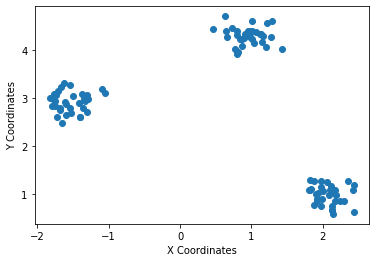

In [2]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [3]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [4]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[-1.538563  ,  2.91165191],
       [ 2.0720792 ,  0.98848385],
       [ 0.95164831,  4.28882085]])

In [5]:
# Get the cluster labels
kmeans.labels_

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0], dtype=int32)

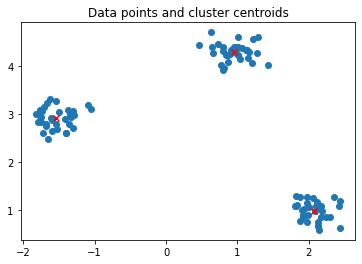

In [6]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [7]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8816040239688525


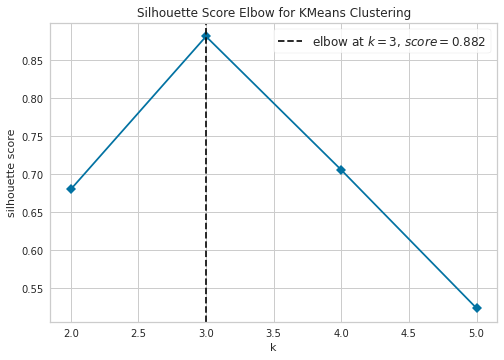

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [8]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2, 6), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()